In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Loading the blood donations data

In [2]:
data = pd.read_csv("transfusion.csv")

In [3]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# 3. Inspecting transfusion DataFrame


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


So:
- There is no missing values.
- All the values in the data is numeric.

### Check Outliers
Using the Tukey method (Tukey JW., 1977) is used to detect ouliers which defines an interquartile range comprised between the 1st and 3rd quartile of the distribution values (IQR). An outlier is a row that have a feature value outside the (IQR +- an outlier step).

In [5]:
# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(data,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(data,2,['Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)'])


In [6]:
#Outliers in train
data.loc[Outliers_to_drop]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007


So, there is no outliers in the data

# 4. Creating target column

In [7]:
data.rename(
    columns = {'whether he/she donated blood in March 2007' : 'Target'},
    inplace = True
)

## EDA - Exploratory Data Analysis

In [8]:
data.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'Target'],
      dtype='object')

C:\Users\Data\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

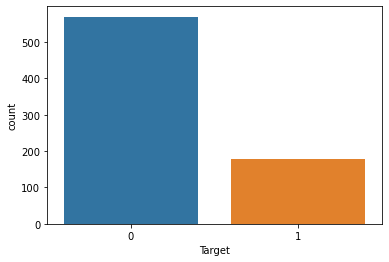

In [9]:
sns.countplot(data['Target'])

C:\Users\Data\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Data\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Data\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Data\anaconda3\lib\site-p

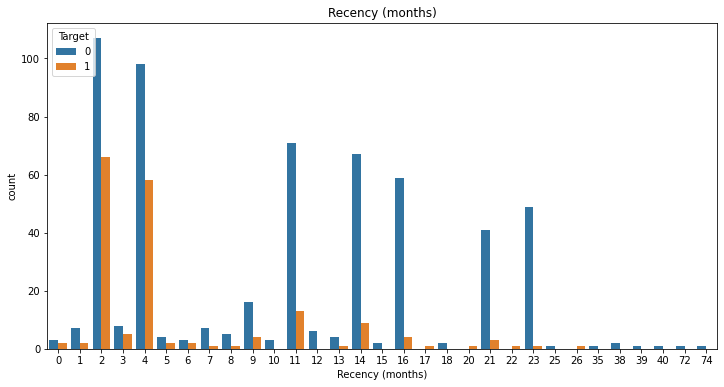

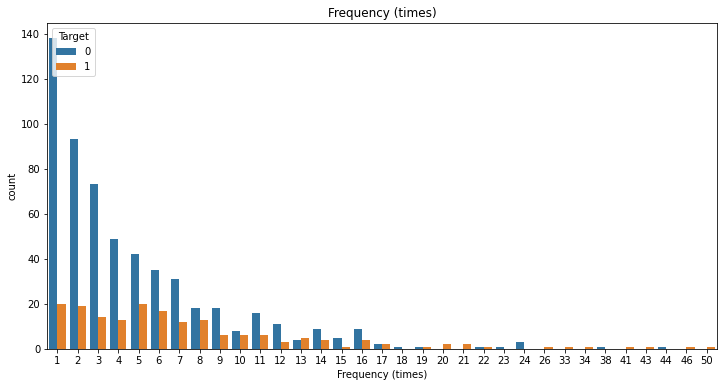

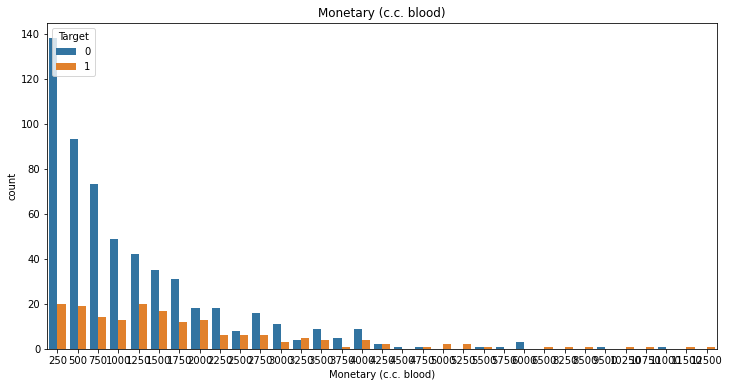

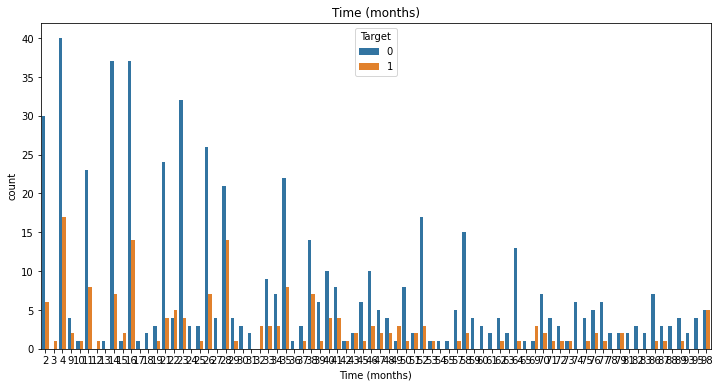

In [11]:
for _ in data.columns[:-1]:
    plt.figure(figsize = (12, 6))
    plt.title("%s" %_)
    sns.countplot(data[_], hue = data['Target'])

***Distribution***

C:\Users\Data\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Target', ylabel='Density'>

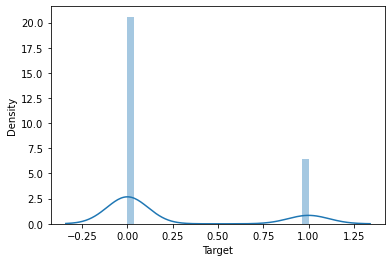

In [12]:
sns.distplot(data['Target'])

C:\Users\Data\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Data\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Data\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

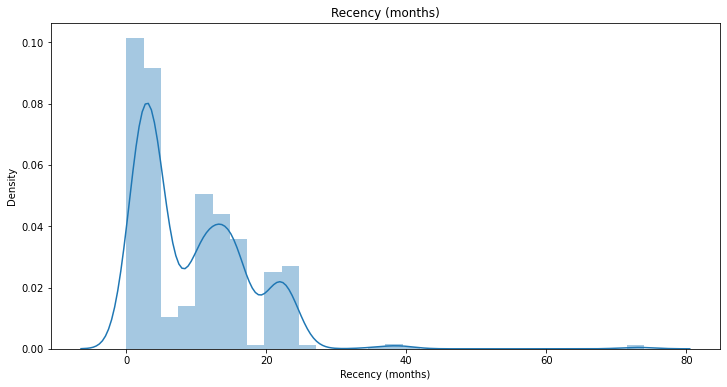

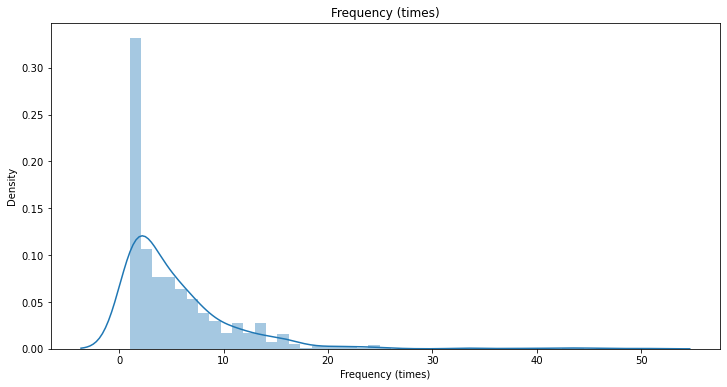

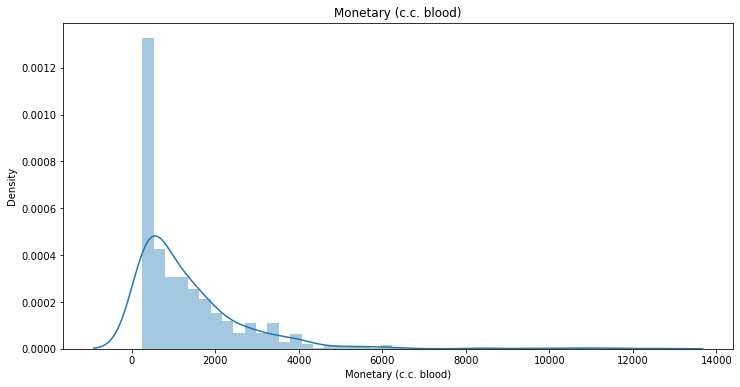

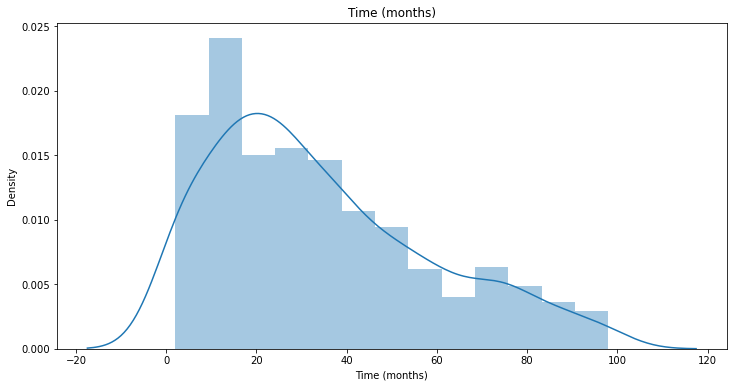

In [13]:
for i in data.columns[:-1]:
    plt.figure(figsize = (12,6))
    plt.title("%s"%i)
    sns.distplot(data[i])

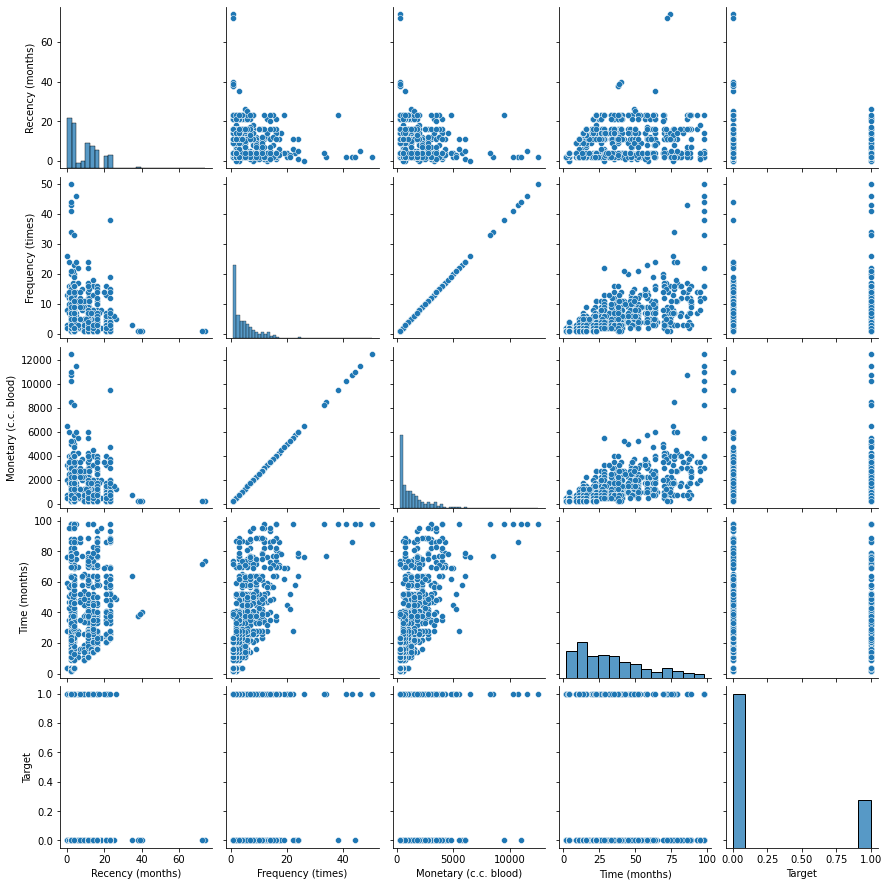

In [14]:
sns.pairplot(data)

<AxesSubplot:>

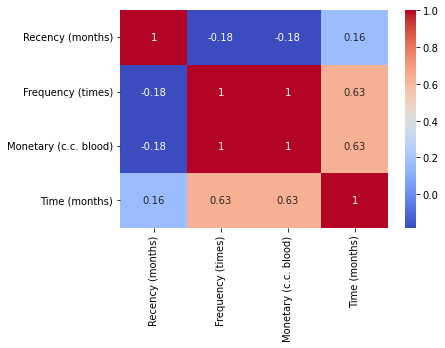

In [15]:
sns.heatmap(data.drop('Target', axis=1).corr(), cmap='coolwarm', annot=True)

This leads us to `multicolinearity issue` that there is perfect correlation between Frequency (times) and Monetary (c.c. blood). So, we need to remove one of them which is Monetary (c.c. blood)

In [16]:
X = data.drop(['Monetary (c.c. blood)', 'Target'], axis=1)
y = data['Target']

# 5. Checking target incidence

In [17]:
data.Target.value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: Target, dtype: float64

# 6. Splitting transfusion into train and test datasets

In [18]:
# import train_test_split method
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns = 'Target'),
    data.Target,
    test_size = 0.25,
    random_state = 42,
    stratify = data.Target
)

# 7. Selecting model using TPOT

In [19]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas>=0.24.2 in c:\users\data\anaconda3\lib\site-packages (from tpot) (1.3.4)



In [20]:
# Import TPOTClassifier and roc_auc_score
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

C:\Users\Data\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [21]:
# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations = 5,
    population_size = 20,
    verbosity = 2,
    scoring = 'roc_auc',
    random_state = 42,
    disable_update_check = True,
    config_dict = 'TPOT light'
)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7422459184429089

Generation 2 - Current best internal CV score: 0.7422459184429089

Generation 3 - Current best internal CV score: 0.7422459184429089

Generation 4 - Current best internal CV score: 0.7422459184429089

Generation 5 - Current best internal CV score: 0.7456308339276876

Best pipeline: MultinomialNB(Normalizer(input_matrix, norm=l2), alpha=0.001, fit_prior=True)


TPOTClassifier(config_dict='TPOT light', disable_update_check=True,
               generations=5, population_size=20, random_state=42,
               scoring='roc_auc', verbosity=2)

In [22]:
# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')


AUC score: 0.7637


In [23]:
# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Best pipeline steps:
1. Normalizer()
2. MultinomialNB(alpha=0.001)


# 8. Checking the variance

In [24]:
X_train.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
count,561.000000,561.000000,561.000000,561.000000
mean,9.500891,5.643494,1410.873440,35.301248
std,8.181016,5.816341,1454.085176,24.721379
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,8.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


In [25]:
# X_train's variance, rounding the output to 3 decimal places
X_train.var().round(3)

Recency (months)              66.929
Frequency (times)             33.830
Monetary (c.c. blood)    2114363.700
Time (months)                611.147
dtype: float64

# 9. Log normalization
`Monetary (c.c. blood)`'s variance is higher than ay other column in the data. This mean that this feature may get more weigth by the model. So, we will correct it by using `Log normalization`.

In [26]:
# Copy X_train and X_test into X_train_normed and X_test_normed
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

In [27]:
# Specify which column to normalize
col_to_normalize = 'Monetary (c.c. blood)'

In [28]:
# Log normalization
for df_ in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

In [29]:
# Check the variance for X_train_normed
X_train_normed.var().round(3)

Recency (months)      66.929
Frequency (times)     33.830
Time (months)        611.147
monetary_log           0.837
dtype: float64

# 10. Training the linear regression model

In [30]:
# Importing modules
from sklearn import linear_model

In [31]:
# Instantiate LogisticRegression
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)

In [32]:
# Train the model
logreg.fit(X_train_normed, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [33]:
# AUC score for tpot model
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7891


# 11. Conclusion

We explored automatic model selection using TPOT and AUC score we got was 0.7850. This is better than simply choosing 0 all the time (the target incidence suggests that such a model would have 76% success rate). We then log normalized our training data and improved the AUC score by 0.5%. In the field of machine learning, even small improvements in accuracy can be important, depending on the purpose.

Another benefit of using logistic regression model is that it is interpretable. We can analyze how much of the variance in the response variable (target) can be explained by other variables in our dataset.